#　セクション3　記述統計

In [229]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import TTestIndPower
from statsmodels.api import qqplot
import matplotlib.pyplot as plt
%matplotlib inline

## データ準備

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布

ヒストグラム
sns.distplot(a, kde=False)
 - a: データarray

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip'>

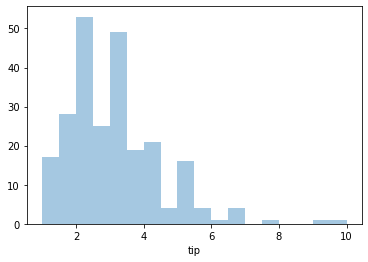

In [4]:
# Warningが出ている理由はsebaornのバージョンが0.11.0以上だとdistplotは無くなりますよ、の警告
# distlotではなく、displotを使えよと言っている
sns.distplot(df['tip'], kde=False)

In [5]:
# Series型
df['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [6]:
# sebaornのバージョン確認
sns.__version__

'0.11.1'

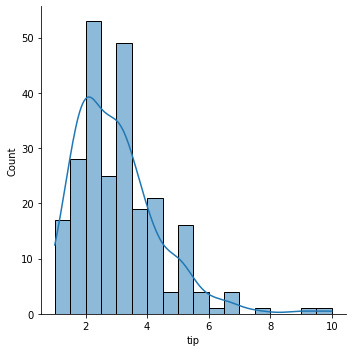

In [7]:
sns.displot(df['tip'], kde='False')

棒グラフ
- sns.catplot(x, data, kind='count')
    - x: x軸にするカテゴリ変数
    - data: カテゴリ変数を含むDataframe

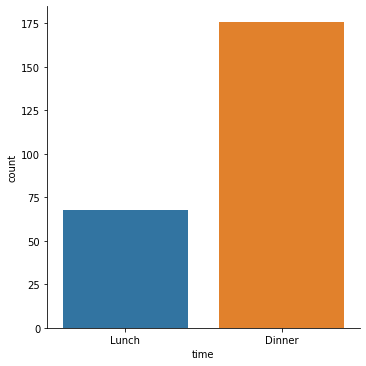

In [8]:
sns.catplot(x='time', data=df, kind='count')

## 平均値

平均値を求める
- np.mean()
- df['column'].mean()
- df.groupby('column').mean()

平均値の描画
- sns.barplot(x, y, data)

In [9]:
np.mean([1, 2, 3])

2.0

In [10]:
# numpyで平均値
np.mean(df['tip_rate'])

0.16080258172250478

In [11]:
# Seriesで平均値
df['tip_rate'].mean()

0.16080258172250478

In [12]:
# カテゴリごとの各カラムの平均値
df.groupby('sex').mean()

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


In [13]:
# 'tip_rate'の平均値だけ見たいとき
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

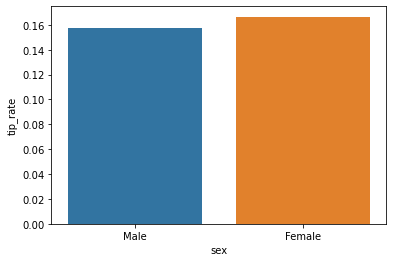

In [14]:
# 平均値の描画
# Seabornで描画
# ciは信頼区間95%のバー。デフォルトではバー有りなので、Noneにする
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

<AxesSubplot:xlabel='sex'>

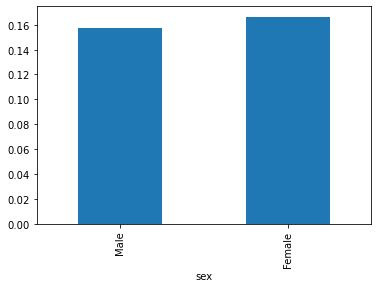

In [15]:
# Seriesで描画
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## 中央値

In [16]:
# numpyで中央値
np.median([1, 3, 5])

3.0

In [17]:
# Seriesで中央値
df['tip_rate'].median()

0.15476977125802577

In [18]:
df['tip_rate']

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tip_rate, Length: 244, dtype: float64

In [19]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

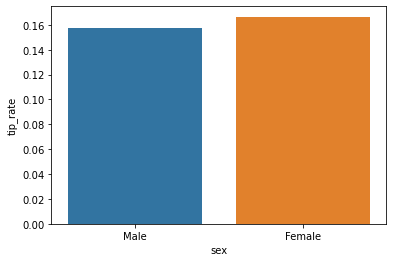

In [20]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

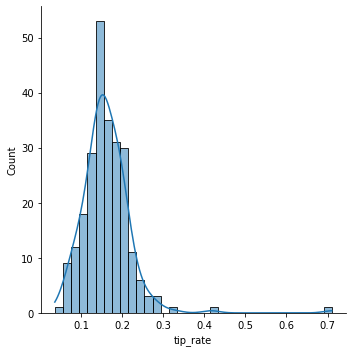

In [21]:
# 中央値と平均値でなぜ値が違うか分析する
# 70%もtipを払っている外れ値の人がいる
sns.displot(df['tip_rate'], kde='False')

In [22]:
# 70%もtipを払っている人はどういう人か分析する
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


In [23]:
df.sort_values('tip_rate', ascending=True)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


## 最頻値

最頻値を求める
- stats.mode()
    - 最頻値を返す
- df['column'].mode()
    - 最頻値をSeriesで返す

In [24]:
mode, count = stats.mode([1,2,2,2,2,2,3,3,3,4,5,6])

In [25]:
mode

array([2])

In [26]:
count

array([5])

In [27]:
print(mode, count)

[2] [5]


In [28]:
mode, count = stats.mode(df)

In [29]:
print(mode, count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]] [[  3  33 157 151  87 176 156   2]]


In [30]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [31]:
df['size'].mode()

0    2
dtype: int64

In [32]:
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

## 範囲（range）

最小値を求める
- np.min()
- df['column'].min()
- df.groupby('column').min()

最大値を求める
- np.max()
- df['column'].max()
- df.groupby('column').max()

In [33]:
np.min(df['tip'])

1.0

In [34]:
df['tip'].min()

1.0

In [35]:
df.groupby('sex').min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [36]:
np.max(df['tip'])

10.0

In [37]:
df['tip'].max()

10.0

In [38]:
df.groupby('sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


## 四分位数

In [39]:
# 四分位数を求める
np.quantile(df['tip'], [0.25, 0.5, 0.75])

array([2.    , 2.9   , 3.5625])

In [40]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [41]:
df['tip'].quantile([0.25, 0.5, 0.75])

0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64

In [42]:
# 四分位範囲（IQR）を求める
stats.iqr(df['tip'])

1.5625

In [43]:
stats.iqr(df['tip_rate'])

0.06234812458689151

In [44]:
# QDはIQRを2で割れば良い
stats.iqr(df['tip']) / 2

0.78125

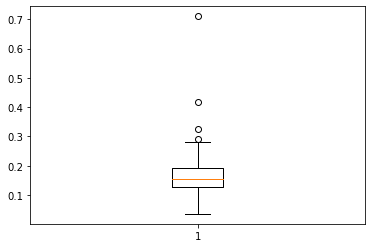

In [45]:
# 箱ひげ図
plt.boxplot(df['tip_rate'])
plt.show()

<AxesSubplot:xlabel='size', ylabel='tip_rate'>

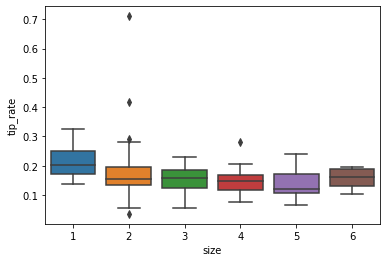

In [46]:
sns.boxplot(x='size', y='tip_rate', data=df)

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

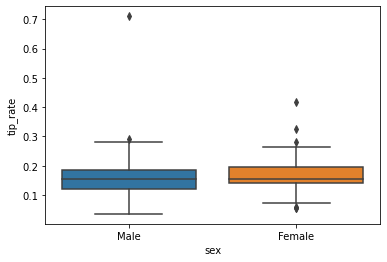

In [47]:
sns.boxplot(x='sex', y='tip_rate', data=df)

## 分散と標準偏差

分散を求める
- np.var()

標準偏差を求める
- np.std()

scipy.statsにも分散を求めるモジュールは用意されているが、普遍分散になるので注意

In [48]:
# 分散
np.var([1, 2, 3, 4])

1.25

In [49]:
np.var(df['tip_rate'])

0.0037145280013546928

In [50]:
np.var(df['tip'])

1.9066085124966428

In [51]:
np.std(df['tip_rate'])

0.060946927743362855

In [52]:
np.std(df['tip'])

1.3807999538298958

In [53]:
np.sqrt(np.var(df['tip']))

1.3807999538298958

# セクション4 2変数間の統計

## 共分散

共分散行列を求める
- np.cov(xarray, yarray, bias=True)
- np.cov(array, bias=True)

よく業務でつかうのはデータフレームで共分散を求める　-> 通常の分散ではなく、普遍分散になってしまうので注意!
- df.cov()

In [54]:
# 共分散行列
# デフォルトは普遍分散が算出されるので、bias=Tureを書く
np.cov([1,2,3], [-4, 5, 6], bias=True)

array([[ 0.66666667,  3.33333333],
       [ 3.33333333, 20.22222222]])

In [55]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [56]:
np.cov(df['total_bill'], df['tip'],bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [57]:
# 対角行列が分散であることを確認
np.var(df['total_bill'])

78.92813148851113

In [58]:
np.var(df['tip'])

1.9066085124966428

In [59]:
# 複数の変数の共分散行列を作るときは
# 全てnumpyarrayにする

# np.array化
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
x.shape

(3, 244)

In [60]:
x

array([[16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
        14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
        16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
        12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
        16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
        18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
        25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
        18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
        26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
        16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
        28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
        12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
        18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
        10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
      

In [61]:
# 複数の変数の共分散行列
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [62]:
# データフレームに対して共分散行列->普遍分散になるので注意
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## 相関係数

相関行列を求める
- np.corrcoef(xarray, yarray)
- np.corrcoef(array)
- df.corr()

相関行列を描画する
- sns.heatmap(df.corr())

In [63]:
np.corrcoef([1, 4, 5], [2, 3, 4])

array([[1.        , 0.96076892],
       [0.96076892, 1.        ]])

In [64]:
# 複数の変数の相関行列を作るときは
# 全てnumpyarrayにする

# np.array化
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)

# 相関行列
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [65]:
# total_billとtip_rateは負の相関->支払額が上がるほどtipの割合は少なくなる
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

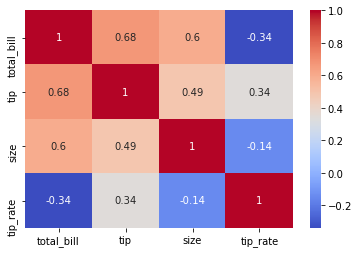

In [66]:
# グラフ描画
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## 連関

分割表を作る
- pd.crosstab(xarray, yarray)

カイ2乗値と期待度数を求める
- stats.chi2_contingency(cont_table, correction=False)
- 第1戻り値：カイ2乗値、第4戻り値：期待度数

In [67]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [68]:
# 分割表
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [69]:
# カイ2乗値と期待度数
# 第1引数：　X^2 = 10.277251918677742
# 第4引数：　期待度数 e
cont_table = pd.crosstab(df['sex'], df['time'])
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

## クラメールの連関係数

Challenge：クラメールの連関係数求めてみよう

2つのarrayを引数にして、クラメールの連関係数を返す関数を作ってみよう

In [70]:
# クラメールの連関係数

def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape)
    n = len(x)
    v = np.sqrt(chi2/(min_d*n))
    return v

In [71]:
cramers_v(df['sex'], df['time'])

0.14512044120766326

# セクション5 確率

##　確率分布

確率分布
- stats.<確率分布>.<メソッド>
- <確率分布>: norm, uniform, randint, binorm, poisson, expon
- <メソッド>: .rvs(), .pdf(), .sf(), .mean(), .var(), .std()

一様分布からランダムにデータを生成する

- stats.randint.rvs(low, high):lowからhigh-1までのランダムな整数を生成
- stats.uniform.rvs(loc, scale):locからscaleまでのランダムな値を生成

In [72]:
# random variates: 確率変量
# 1〜6までの値をランダムで返す
stats.randint.rvs(1, 7)

5

In [73]:
# 下記のような書き方でも良い
stats.randint(1, 7).rvs()

5

In [74]:
stats.randint.mean(1, 7)

3.5

In [75]:
stats.uniform(0, 1).rvs()

0.4974326234488162

## 確率分布の描画(PMF/PDF)

関数の描画をおさらい
1. 関数を作る
2. numpyのlinspace（連続型の場合）やarange（離散型の場合）でx値の生成
3. 関数にxを渡してｙを生成
4. plt.plot()で描画する

In [76]:
def sample_func(x):
    return x**2 + 3

In [77]:
sample_func(2)

7

In [78]:
# x = np.linspace(-3, 3, 100)
x = np.arange(-3, 4)
x

array([-3, -2, -1,  0,  1,  2,  3])

In [79]:
y = sample_func(x)
y

array([12,  7,  4,  3,  4,  7, 12])

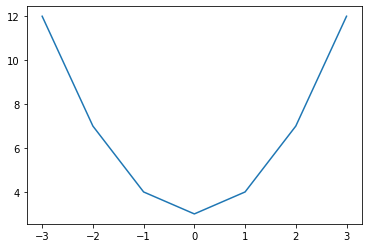

In [80]:
plt.plot(x, y)

一様分布を描画する
- stats.stats.randint(1, 7).pmf(x): pmfはProbability Mass Function（確率質量関数）
- stats.uniform(loc=0, scale=1).pdf(x): pdfはProbability Density Function（確率密度関数）

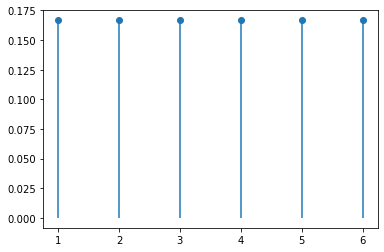

In [81]:
# 離散型の一様分布の描画
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x, y, 'o') # dotは'o'、点線は'-'
plt.vlines(x, 0, y) # 0〜dotにかけて縦線を引く

In [82]:
x

array([1, 2, 3, 4, 5, 6])

In [83]:
y

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

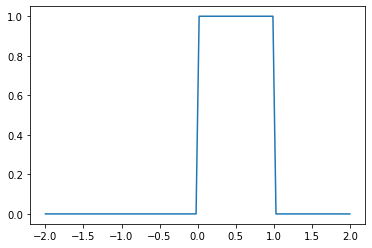

In [84]:
# 連続型の一様分布の描画
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x, y)

In [85]:
stats.uniform(loc=0, scale=1).pdf(0.3)

1.0

## 累積分布関数(CDF)

正規分布(.normメソッド)の確率密度関数(PDF)と累積分布関数(CDF)を求める
- PDF：stats.norm.pdf(x)
- CDF：stats.norm.cdf(x)

右側の面積(1-累積分布関数(CDF))を求める
- SF:stats.norm.sf(x)
- Survival Function（1-CDF）

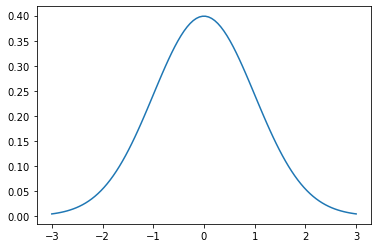

In [86]:
# 正規分布の確率密度分布（PDF）
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

In [87]:
y

array([0.00443185, 0.00530579, 0.00632878, 0.00752133, 0.00890582,
       0.0105065 , 0.01234943, 0.01446241, 0.01687483, 0.01961746,
       0.02272223, 0.02622189, 0.03014961, 0.03453857, 0.03942137,
       0.0448295 , 0.05079264, 0.05733801, 0.06448952, 0.07226707,
       0.08068571, 0.08975477, 0.09947714, 0.10984842, 0.12085626,
       0.13247967, 0.14468855, 0.15744319, 0.17069405, 0.18438164,
       0.1984366 , 0.21277993, 0.22732351, 0.24197072, 0.2566174 ,
       0.27115285, 0.28546117, 0.29942268, 0.31291556, 0.3258175 ,
       0.33800759, 0.34936814, 0.35978656, 0.36915722, 0.37738323,
       0.38437808, 0.3900672 , 0.39438923, 0.39729716, 0.39875915,
       0.39875915, 0.39729716, 0.39438923, 0.3900672 , 0.38437808,
       0.37738323, 0.36915722, 0.35978656, 0.34936814, 0.33800759,
       0.3258175 , 0.31291556, 0.29942268, 0.28546117, 0.27115285,
       0.2566174 , 0.24197072, 0.22732351, 0.21277993, 0.1984366 ,
       0.18438164, 0.17069405, 0.15744319, 0.14468855, 0.13247

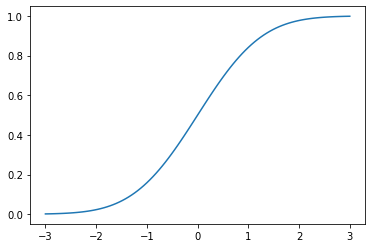

In [88]:
# 正規分布の累積密度分布（CDF）
x = np.linspace(-3, 3, 100)
y = stats.norm.cdf(x)
plt.plot(x, y)

In [89]:
y

array([0.0013499 , 0.00164427, 0.00199603, 0.00241482, 0.00291159,
       0.00349868, 0.00418999, 0.00500104, 0.00594906, 0.00705314,
       0.00833425, 0.00981533, 0.01152131, 0.01347915, 0.01571778,
       0.01826811, 0.02116287, 0.02443656, 0.02812518, 0.03226612,
       0.03689778, 0.04205935, 0.04779035, 0.0541303 , 0.06111818,
       0.06879198, 0.07718815, 0.08634102, 0.09628221, 0.10704004,
       0.11863893, 0.13109879, 0.14443448, 0.15865525, 0.17376426,
       0.18975815, 0.20662669, 0.2243525 , 0.24291088, 0.26226972,
       0.28238953, 0.30322357, 0.32471814, 0.34681289, 0.36944134,
       0.39253143, 0.41600624, 0.43978468, 0.46378241, 0.48791269,
       0.51208731, 0.53621759, 0.56021532, 0.58399376, 0.60746857,
       0.63055866, 0.65318711, 0.67528186, 0.69677643, 0.71761047,
       0.73773028, 0.75708912, 0.7756475 , 0.79337331, 0.81024185,
       0.82623574, 0.84134475, 0.85556552, 0.86890121, 0.88136107,
       0.89295996, 0.90371779, 0.91365898, 0.92281185, 0.93120

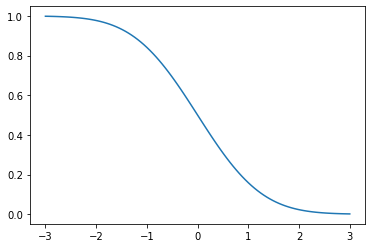

In [90]:
# 右側の面積(1-累積分布関数(CDF))を求める
x = np.linspace(-3, 3, 100)
y = stats.norm.sf(x)
plt.plot(x, y)

## 正規分布

正規分布
- stats.norm
- 引数：locは平均, scaleは標準偏差
- stats.norm(loc=2, scale=5).pdf(x)
- デフォルトは、loc=0, scale=1 (標準正規分布)

.norm以下の各メソッドの復習
- .rvs(): 分布からランダムで値を取得する(random　variates)
- .pdf(): 確率密度関数(probablity density function)
- .pmf(): 確率質量関数(probablity mass function)
- .cdf(): 累積確率密度関数(cumulative density function)
- .sf(): 1-CDF
- .mean(): 平均
- .std(): 標準偏差
- .var(): 分散

In [91]:
stats.norm(loc=10, scale=3).rvs()

8.159026054390656

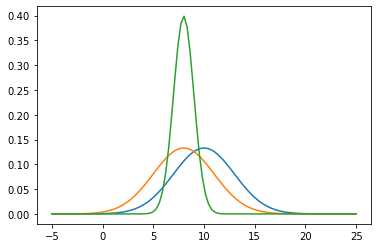

In [92]:
# 正規分布の確率分布の描画
# normの引数：　locは平均、scale：標準偏差
x = np.linspace(-5, 25, 100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

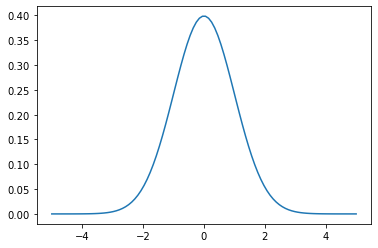

In [93]:
# 標準正規分布
x = np.linspace(-5, 5, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

## カーネル密度推定(KDE)

KDEした確率分布を求める
- statsgaussian_kde(dataset).reasmple()
- statsgaussian_kde(dataset).pdf()

KDEを描画する

- sns.displot(dataset, kde=True)
- stats.gaussian_kde(dataset).pdf(x)

In [94]:
stats.gaussian_kde([1,1,2,3,1,4,5,2,4]).resample()

array([[0.43909066, 4.87638516, 4.88100864, 1.09782188, 1.7914039 ,
        1.0835173 , 4.45087198, 4.05564279, 7.22922183]])

x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde([1,1,2,3,1,4,5,2,4]).pdf(x)
plt.plot(x, y)

In [95]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


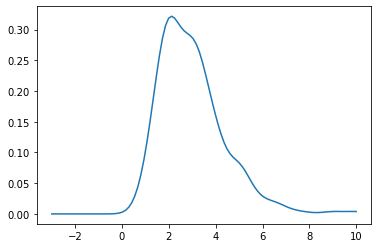

In [96]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(df['tip']).pdf(x)
plt.plot(x, y)

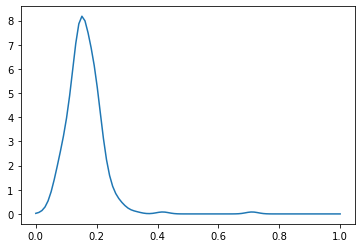

In [97]:
x = np.linspace(0, 1, 100)
y = stats.gaussian_kde(df['tip_rate']).pdf(x)
plt.plot(x, y)

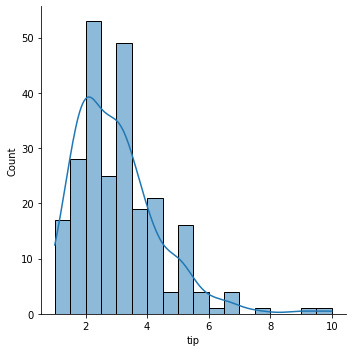

In [98]:
sns.displot(df['tip'], kde=True)

# セクション6 正規分布と標準化

## 68-95-99.7ルール

Challenge：<br>
平均4,標準偏差3の正規分布からランダムに値を1000個取得し、<br>
それぞれの割合が68%, 95%, 99.7%となるか確認してみよう

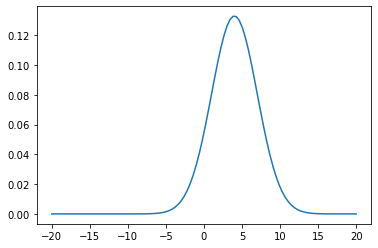

In [99]:
x = np.linspace(-20, 20, 100)
y = stats.norm(loc=4, scale=3).pdf(x)
plt.plot(x, y)

In [100]:
group1 = []
group2 = []
group3 = []
samples = []
ave = 4
std = 3
for i in range(1000):
    sample = stats.norm(loc=ave,scale=std).rvs()
    if ave-std < sample < ave+std:
        group1.append(sample)
    elif ave-2*std < sample < ave+2*std:
        group2.append(sample)
    elif ave-3*std < sample < ave+3*std:
        group3.append(sample)
    samples.append(sample)

In [101]:
stats.norm(loc=4,scale=3).rvs()

5.701743743889381

In [102]:
print(len(group1)/len(samples))
print((len(group1) + len(group2))/len(samples))
print((len(group1) + len(group2) + len(group3))/len(samples))

0.683
0.955
0.998


## 標準化

sklearn.preprocessing.StandardScaler

- scaler = StandardScaler()
- scaled = scale.fit_transform(data)
    - インスタンスを生成し、.fit_transform()をcallする

In [103]:
scaler = StandardScaler()

In [104]:
scaler.fit_transform([[1], [2], [3], [4]])

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [105]:
df['tip_rate'].values.reshape(-1, 1).shape

(244, 1)

In [106]:
# 1次元の標準化
scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1))

In [107]:
scaled[0:4]

array([[-1.66301817],
       [-0.00428234],
       [ 0.09491467],
       [-0.34492594]])

In [108]:
# 2次元の標準化：　.values.reshape(-1, 1)でarray化が不要
scaled = scaler.fit_transform(df[['total_bill', 'tip_rate']])

In [109]:
scaled[0:4]

array([[-0.31471131, -1.66301817],
       [-1.06323531, -0.00428234],
       [ 0.1377799 ,  0.09491467],
       [ 0.4383151 , -0.34492594]])

In [110]:
# 偏差値にする時
(50 + scaled * 10)[0:4]

array([[46.85288695, 33.36981828],
       [39.36764687, 49.95717657],
       [51.377799  , 50.94914672],
       [54.38315103, 46.5507406 ]])

## 二項分布

二項分布の確率を求める
- stats.binom(n, p)
- ある事象が起こる確率pの試行をn回実施してその事業がx買い起こる確率P(x)

二項分布を描画する
- stats.binom(n,p).pmf()

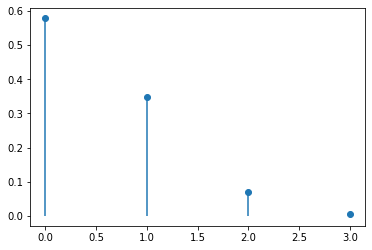

In [111]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=3, p=1/6).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

In [112]:
x

array([0, 1, 2, 3])

In [113]:
y

array([0.5787037 , 0.34722222, 0.06944444, 0.00462963])

## 二項分布と正規分布

Challenge
- nを大きくした時の二項分布を確認してみよう！
- stats.binomを使って、nを大きくした時の二項分布が正規分布（N(np,npq)）に近づくことを確認してみよう

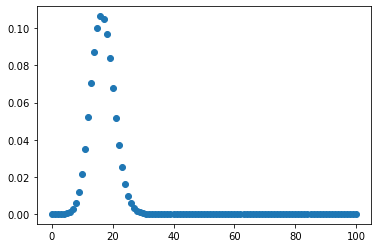

In [114]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n, p).pmf(x)
plt.plot(x, y, 'o')

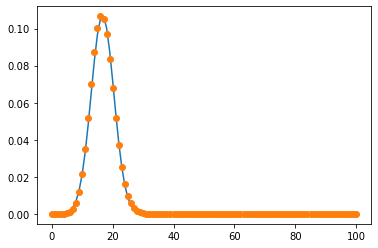

In [115]:
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)
plt.plot(x, y, 'o')

In [116]:
# 平均＝np
stats.binom(n, p).mean()

16.666666666666664

In [117]:
# 分散＝npq
stats.binom(n, p).var()

13.888888888888888

# セクション7 推測統計入門

## 母集団の平均

Challenge
- データセットの母集団と見立てて、50個標本を100回抽出した時の標本平均値の分布を（平均と分散）をみてみよう。
- ヒント：df.sample(50) からランダムでn行抽出する

In [118]:
m = 100
n = 50
column = 'tip'
sample_means = []
for i in range(m):
    sampled_df = df[column].sample(n)
    sample_mean = sampled_df.mean()
    sample_means.append(sample_mean)

In [119]:
# 母平均
df[column].mean()

2.9982786885245902

In [120]:
# 平均推定量
np.mean(sample_means)

3.0190180000000004

In [121]:
# 母分散/n
df[column].var() / n

0.03828909276124945

In [122]:
# 母分散/(n-1)
df[column].var() / (n-1)

0.03907050281760148

In [123]:
# 平均推定量の分散
np.var(sample_means)

0.031035464875999983

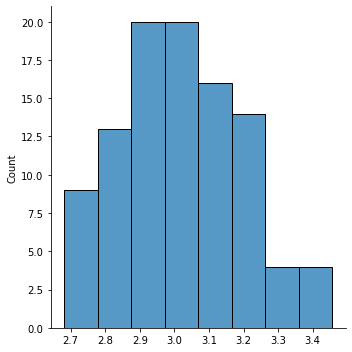

In [124]:
# 平均推定量の分布
sns.displot(sample_means)

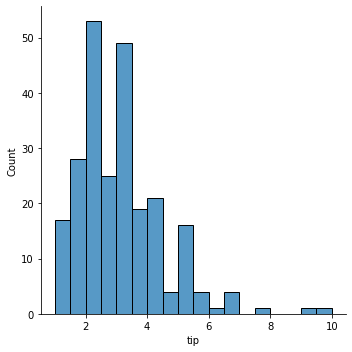

In [125]:
# 母集団の分布
sns.displot(df[column])

## 不偏分散

不偏分散を求める
- stats.tvar(a)
- np.var(a, ddof=1)
    - ddof:defree of freedom(自由度)
不偏分散の平方根を求める
- stats.tstd(a)
- np.std(a, ddof=1)

In [126]:
# 不偏分散
stats.tvar(df['tip'])

1.914454638062471

In [127]:
# 不偏分散
np.var(df['tip'], ddof=1)

1.9144546380624725

In [128]:
# 分散
np.var(df['tip'])

1.9066085124966428

In [129]:
# 不偏分散の平方根
stats.tstd(df['tip'])

1.3836381890011822

In [130]:
# 不偏分散の平方根
np.std(df['tip'], ddof=1)

1.3836381890011826

In [131]:
# 標準偏差
np.std(df['tip'])

1.3807999538298958

## 不偏分散の不偏性

Challenge

不偏分散の”不偏性”を確認してみよう<br>
データセットを母集団に見立てて、50個の標本を100回抽出して標本の分散と不偏分散の平均がそれぞれどうなるか見てみよう

In [132]:
m = 100
n = 50
column = 'tip'
sample_vars = []
sample_vars_ddof1 = []
for i in range(m):
    df_sample = df[column].sample(n)
    sample_var = np.var(df_sample)
    sample_var_ddof1 = np.var(df_sample, ddof=1)
    sample_vars.append(sample_var)
    sample_vars_ddof1.append(sample_var_ddof1)

In [133]:
# 標本の分散の平均
np.mean(sample_vars)

1.891750936

In [134]:
# 標本の不偏分散の平均： 普遍分散の平均方が標本の分散よりも値が大きく、母集団の分散に近くなる
np.mean(sample_vars_ddof1)

1.9303580979591837

In [135]:
# 母集団の分散
np.var(df[column])

1.9066085124966428

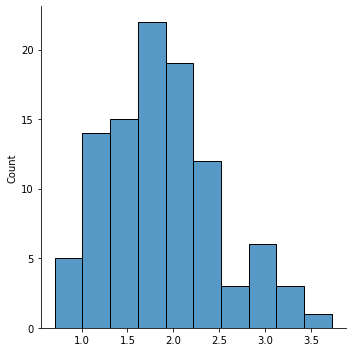

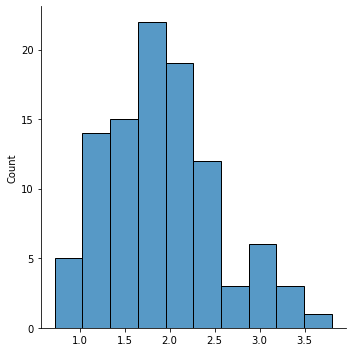

In [136]:
sns.displot(sample_vars)
sns.displot(sample_vars_ddof1)

In [137]:
# 正当

m = 100
n = 50
column = 'tip'
sample_vars = []
sample_u_vars = []
for i in range(m):
    df_sample = df[column].sample(n)
    sample_var = np.var(df_sample)
    sample_u_var = np.var(df_sample, ddof=1)
    sample_vars.append(sample_var)
    sample_u_vars.append(sample_u_var)

# セクション8 区間推定

## 比率の区間推定

比率の区間推定をする
- stats.binom.interval(alpha, n, p)
- intervalは区間推定の区間という意味
- 例えば、「世論の内閣支持率を調査する」時、このメソッドの返す値は、標本1000人、　標本比率0.6としたとき、1000人に対する区間の数を値として返す

In [138]:
# 95%の信頼区間で、標本1000人に対する支持率0.6の区間を考える
# 1000人中570人〜630人が95%信頼区間（つまり、57%〜６３％）
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

In [139]:
# 99%の信頼区間で、標本1000人に対する支持率0.6の区間を考える
stats.binom.interval(0.99, 1000, 0.6)

(560.0, 640.0)

Challenge：実データで100回比率を推定してみよう!

データセットを母集団と見立てて、50回の標本比率から母比率を区間推定してみよう。<br>
これを100回繰り返したら何回正しく推定できるのか確認してみよう（95信頼区間とする）

In [140]:
# dfから50個のサンプルを取ってくる
df.sample(50)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
188,18.15,3.50,Female,Yes,Sun,Dinner,3,0.192837
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
70,12.02,1.97,Male,No,Sat,Dinner,2,0.163894
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
111,7.25,1.00,Female,No,Sat,Dinner,1,0.137931
216,28.15,3.00,Male,Yes,Sat,Dinner,5,0.106572
68,20.23,2.01,Male,No,Sat,Dinner,2,0.099357
45,18.29,3.00,Male,No,Sun,Dinner,2,0.164024
55,19.49,3.51,Male,No,Sun,Dinner,2,0.180092
116,29.93,5.07,Male,No,Sun,Dinner,4,0.169395


In [141]:
n = 50
m = 100
alpha = 0.95
population_male_ratio = len(df[df['sex'] == 'Male']) / len(df)
results = []

for _ in range(m):
    sample_df = df.sample(n)
    male_ratio = len(sample_df[sample_df['sex']=='Male'])/len(sample_df)
    min_num, max_num = stats.binom.interval(alpha, n=n, p=male_ratio)
    min_ratio = min_num / n
    max_ratio = max_num / n
    correct = min_ratio < population_male_ratio < max_ratio
    results.append({'min':min_ratio, 'max':max_ratio, 'correct':correct})

In [142]:
results_df = pd.DataFrame(results)

In [143]:
results_df['correct'].value_counts()

True     95
False     5
Name: correct, dtype: int64

In [144]:
results_df.head()

,min,max,correct
0,0.46,0.74,True
1,0.52,0.78,True
2,0.56,0.82,True
3,0.52,0.78,True
4,0.38,0.66,True


## 平均の区間推定


正規分布を使って平均の区間推定をする
- stats.norm.interval(alpha, loc, scale)
- locには標本平均、scaleには標本の標準偏差ではなく標本の不偏分散の平方根を入れることに注意

Challenge

実データで100回平均の推定をしてみよう<br>
データセットを母集団と見立てて、50個の標本平均から正規分布を使って母平均の区間推定をしよう！<br>
これを100回繰り返したら、何回推定できるのか見てみよう

In [145]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [146]:
n = 50
m = 100
alpha = 0.95
column = 'tip'
population_mean = df[column].mean()
results = []

for _ in range(m):
    df_sample = df.sample(n)
    sample_mean = df_sample[column].mean()
    sample_var = stats.tvar(sample_df[column])
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
    correct = min_val < population_mean < max_val
    results.append({'min': min_val, 'max_val': max_val, 'correct': correct})

In [147]:
result_df = pd.DataFrame(results)

In [148]:
result_df.head()

,min,max_val,correct
0,2.783341,3.687459,True
1,2.402141,3.306259,True
2,2.449941,3.354059,True
3,2.547741,3.451859,True
4,2.412141,3.316259,True


In [149]:
result_df['correct'].value_counts()

True    100
Name: correct, dtype: int64

## t分布

ｔ分布
- stats.t(df)

例：自由度1,6,11のt分布と標準正規分布を描画する
- stats.t(df).pdf()
- stats.norm.pdf()

In [150]:
# 自由度1のｔ分布からランダムに1つ取ってくる
stats.t(1).rvs()

-0.9588316564199222

In [151]:
# 自由度1のｔ分布のx軸が2のところのｙ軸の値を返す
stats.t(1).pdf(2)

0.06366197723675815

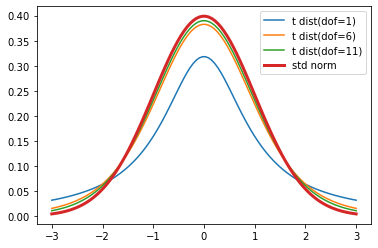

In [152]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label='std norm', linewidth=3)
plt.legend()

## 平均の区間推定(正規分布 vs t分布)

t分布の区間推定
- stats.t.interval(alpha, loc, scale, df)
- loc:標本平均、scale:標本の不偏分散の平方根、df:自由度

Challenge

実データで平均の区間推定をしてみよう<br>
データセットを母集団と見立てて、50個の標本平均から正規分布を使った母平均の区間推定とt分布を使った区間推定の結果がどうなるか見てみよう

In [153]:
n = 50
m = 100
alpha = 0.95
column = 'tip'
population_mean = df[column].mean()
results = []

for _ in range(m):
    df_sample = df.sample(n)
    sample_mean = df_sample[column].mean()
    sample_var = stats.tvar(sample_df[column])
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
    correct = min_val < population_mean < max_val
    results.append({'min': min_val, 'max_val': max_val, 'correct': correct})

In [154]:
column = 'tip'
alpha = 0.95
n = 50
population_mean = df[column].mean()

sample_df = df.sample(n)
sample_mean = sample_df[column].mean()
sample_var = stats.tvar(sample_df[column])
# 標準正規分布の95%信頼区間
min_val_norm, max_val_norm = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
# t分布の95%信頼区間->alpha,loc,scaleはそのまま. dfは自由度(50-1)
min_val_t, max_val_t = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=n-1)

In [155]:
population_mean

2.9982786885245902

In [156]:
sample_mean

2.755

In [157]:
print(min_val_norm, max_val_norm, max_val_norm - min_val_norm)

2.407471789190838 3.1025282108091616 0.6950564216183235


In [158]:
# t分布の方が95%信頼区間が広くなる
print(min_val_t, max_val_t, max_val_t - min_val_t)

2.39867504135933 3.1113249586406697 0.7126499172813396


# セクション10 2群の比率差の検定

比率の差の検定
- statsmodels.stats.proportion.proportions_ztest(count, nobs, alternative)
    - count: 標本の中で実際に観察できた数
    - nobs(the number of observations): 標本の大きさ
    - alternative: 'two-sided', 'smaller', 'larger'('smaller':p1<p2, 'larger':p1>p2)
- (zstats, p-value)で返ってくる

In [159]:
# 例：自社のWebサイトにおいて、新しい施策をしたことによりクリック率が上がったかどうかを確かめたい
proportions_ztest([30, 33], [1000, 1000], alternative='smaller')

(-0.3840618481549573, 0.35046630388746547)

#　セクション11 連関の検定(カイ2乗検定)

## 連関の検定

連関の検定

- chi2, p, dof, ex = stats.chi2_contingency(obs, correction=False)
    - obs: 観測度数
    - correction: イェイツの修正（通常はFalseでOK）
- 例: 以下の分割表で両者間の連関があるか？

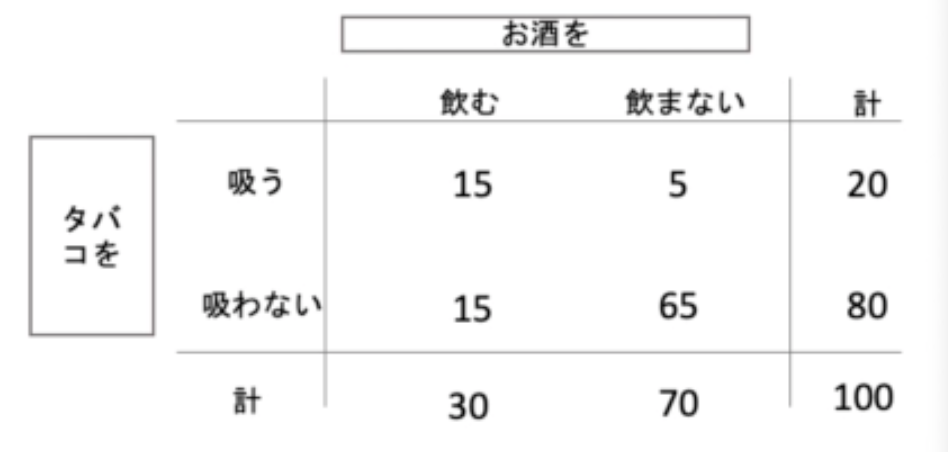

In [160]:
obs = [[15, 5], [15, 65]]
stats.chi2_contingency(obs, correction=False)

(24.107142857142858,
 9.112167294252327e-07,
 1,
 array([[ 6., 14.],
        [24., 56.]]))

## Z検定とカイ2乗検定

Challenge：　Z検定とカイ2乗検定が同じになることを確認してみよう

データセットを母集団と見立てて標本を2つ作り、それぞれの標本の比率の差の検定をZ検定およびｐ値が同じになることを確かめよう

In [161]:
# 例：自社のWebサイトにおいて、新しい施策をしたことによりクリック率が上がったかどうかを確かめたい
proportions_ztest([30, 33], [1000, 1000], alternative='smaller')

(-0.3840618481549573, 0.35046630388746547)

In [162]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [163]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [164]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [165]:
n = 50
df_sample1 = df.sample(n)
df_sample2 = df.sample(n)

In [166]:
count1 = df_sample1['time'].value_counts()['Dinner']
count2 = df_sample2['time'].value_counts()['Dinner']

In [167]:
# Z検定
proportions_ztest([count1, count2], [n, n], alternative='two-sided')

(0.44543540318737435, 0.6560051321908608)

In [168]:
sample_freq1 = df_sample1['time'].value_counts().values
sample_freq2 = df_sample2['time'].value_counts().values

In [169]:
sample_freq1

array([37, 13])

In [170]:
# カイ2乗検定
obs = [sample_freq1, sample_freq2]
stats.chi2_contingency(obs, correction=False)

(0.1984126984126984,
 0.6560051321908611,
 1,
 array([[36., 14.],
        [36., 14.]]))

In [171]:
obs

[array([37, 13]), array([35, 15])]

# セクション12 ｔ検定

t検定
- スチューデントのｔ検定: stats.ttest_ind(a, b, equal_var=True)
- ウェルチのｔ検定: stats.ttest_ind(a, b, equal_var=False)
    - 第1戻り値はｔ値、第2戻り値はｐ値

Challenge

ｔ検定をやってみよう
データセットを標本と見立てて、男女のチップ率の平均に差をスチューデントのｔ検定およびウェルチのｔ検定を使って検定してみよう

In [172]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [173]:
male_tips = df[df['sex'] == 'Male']['tip_rate']
female_tips = df[df['sex'] == 'Female']['tip_rate']

In [174]:
print(np.mean(male_tips), np.mean(female_tips))

0.15765054700429748 0.16649073632892475


In [175]:
print(np.var(male_tips), np.var(female_tips))

0.004169445577529407 0.0028433004255488206


In [176]:
# スチューデントのｔ検定:　棄却域にいない。帰無仮説が採択。有意差なし
stats.ttest_ind(a=male_tips, b=female_tips, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

In [177]:
# ウェルチのｔ検定: 棄却域にいない。帰無仮説が採択。有意さなし
stats.ttest_ind(a=male_tips, b=female_tips, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip_rate', ylabel='Density'>

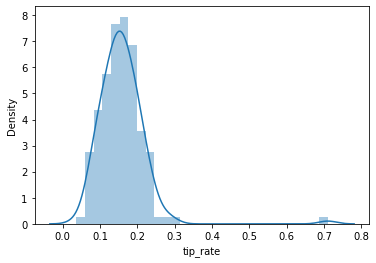

In [178]:
sns.distplot(male_tips)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip_rate', ylabel='Density'>

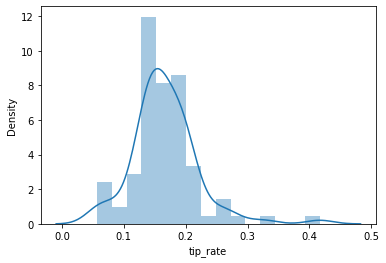

In [179]:
sns.distplot(female_tips)

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

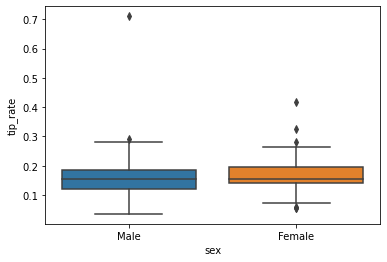

In [180]:
sns.boxplot(data=df, x='sex', y='tip_rate')

# セクション13 正規性と等分散性の検定

## Q-Qプロット

Q-Qプロット

- statsmodel.api.qqplot(data, line='r')
    - 関数内で描画される
    - matplotlibでfigureを返す
    - line='r'で、　regression(回帰)の結果を描画する

In [181]:
male_tipr = df[df['sex'] == 'Male']['tip_rate']
female_tipr = df[df['sex'] == 'Female']['tip_rate']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip_rate', ylabel='Density'>

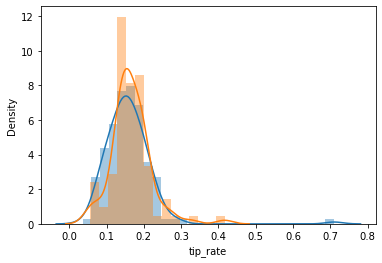

In [182]:
# 男性/女性のtip_rateが正規分布であるかを確認する　->　ヒストグラム
sns.distplot(male_tipr)
sns.distplot(female_tipr)

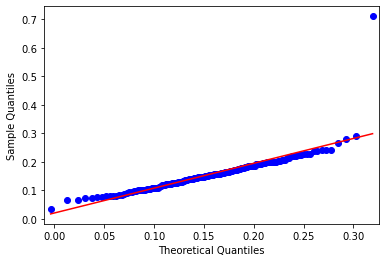

In [243]:
fig = qqplot(male_tipr, 
             line='r', 
             dist=stats.norm(loc=np.mean(male_tipr), 
                             scale=np.sqrt(stats.tvar(male_tipr))))

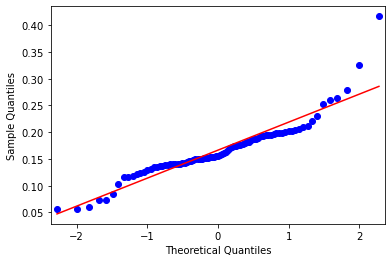

In [244]:
fig = qqplot(female_tipr, line='r')

## シャピロ-ウィルク検定

シャピロ-ウィルク検定
- stats.shapiro(x)
    - データxに正規性があるかを検定する
    - 第一戻り値は検定統計量
    - 第二戻り値はｐ値

In [185]:
# p値が5%より小さい -> 帰無仮説：「この母集団は正規分布に従う」が棄却域に存在するので、対立仮説が採択。
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447847127914429, pvalue=3.2243281107541917e-15)

In [186]:
# p値が5%より小さい -> 帰無仮説：「この母集団は正規分布に従う」が棄却域に存在するので、対立仮説が採択。
stats.shapiro(female_tipr)

ShapiroResult(statistic=0.8982974290847778, pvalue=4.717996489489451e-06)

In [187]:
# 外れ値があることにより、male_tiprの方は直線的だが、「正規分布ではない」という結果になってしまう
# 外れ値を抜いて考えてみる
np.sort(male_tipr)[:-1]

array([0.03563814, 0.06565988, 0.0665336 , 0.07180385, 0.07398274,
       0.07717751, 0.07745933, 0.07861635, 0.0789266 , 0.07936508,
       0.0814664 , 0.08329863, 0.08364236, 0.08822232, 0.09001406,
       0.09452888, 0.09553024, 0.09560229, 0.09820426, 0.09935739,
       0.09984301, 0.10116338, 0.10181582, 0.10251227, 0.1035554 ,
       0.10379905, 0.10506961, 0.10620491, 0.10647182, 0.10657194,
       0.10677083, 0.10789981, 0.1117943 , 0.11607143, 0.11773472,
       0.11774956, 0.11893435, 0.12038523, 0.12128563, 0.12138869,
       0.12262416, 0.12359551, 0.12413108, 0.12468828, 0.125     ,
       0.12539185, 0.12703379, 0.1282437 , 0.12942192, 0.13031915,
       0.13049096, 0.13138686, 0.13181019, 0.13623978, 0.13636364,
       0.13649025, 0.13812155, 0.13924051, 0.13942407, 0.13965087,
       0.13978041, 0.14177694, 0.14191107, 0.14192496, 0.14278915,
       0.14482259, 0.14482259, 0.14547537, 0.14662757, 0.14669927,
       0.14705882, 0.14803849, 0.14958863, 0.14962594, 0.15008

In [188]:
# 外れ値を抜いたらｐ値が5%より高くなった　-> 
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

## F分布

F分布

- stats.f(dfn, dfd)
    - dfn:分子の自由度
    - dfd:分母の自由度

F分布の描画

- stats.f(dfn, dfd).pdf(x)

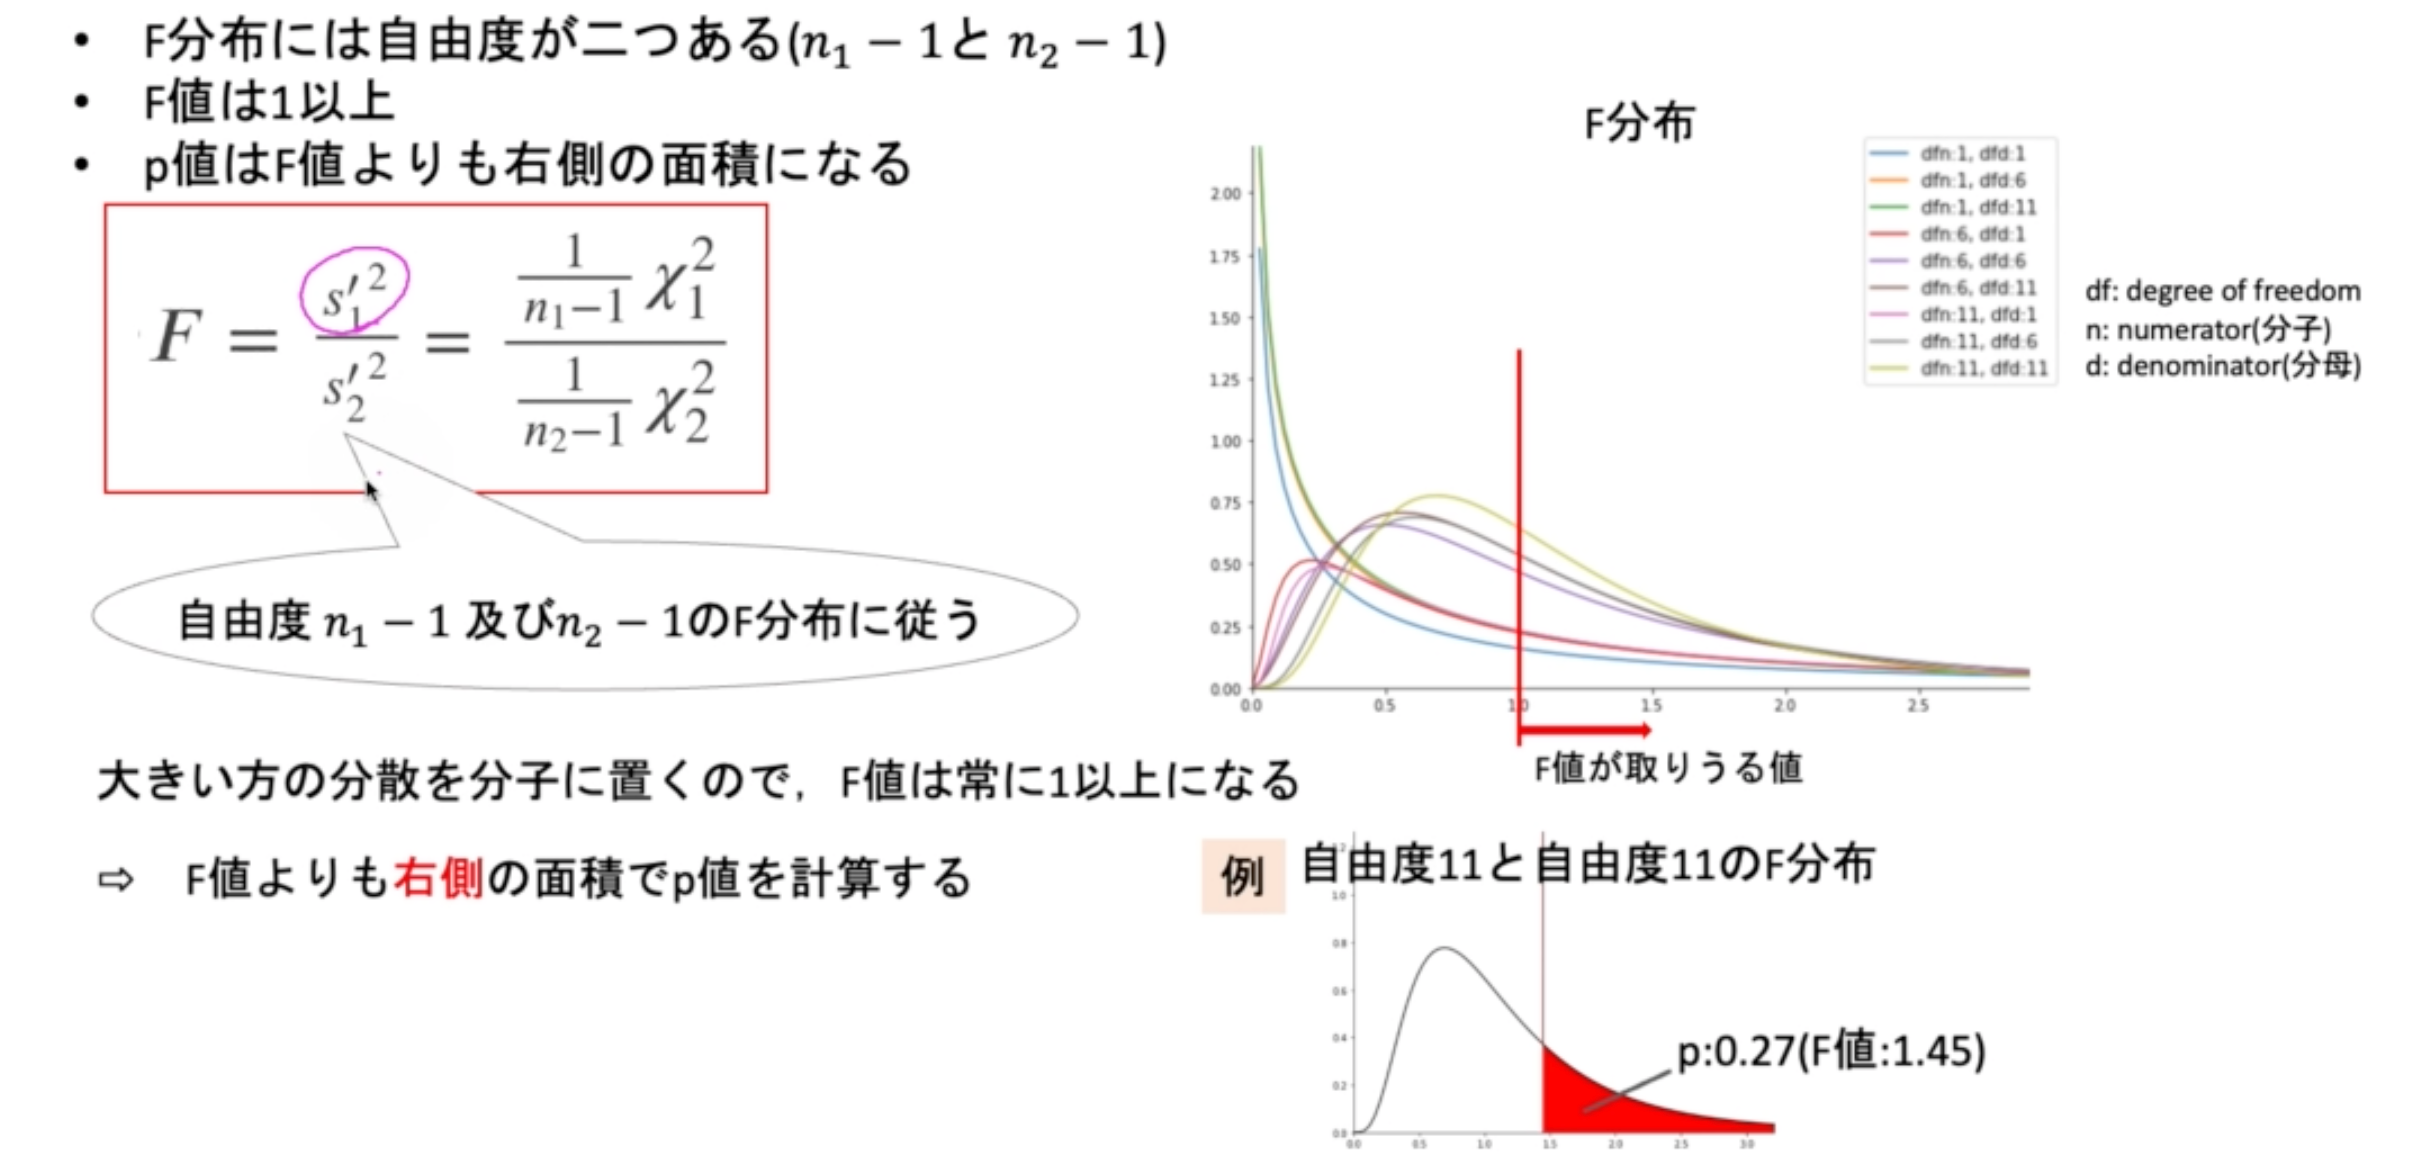

In [189]:
male_tipr

1      0.160542
2      0.166587
3      0.139780
5      0.186240
6      0.228050
         ...   
236    0.079365
237    0.035638
239    0.203927
241    0.088222
242    0.098204
Name: tip_rate, Length: 157, dtype: float64

In [190]:
female_tipr

0      0.059447
4      0.146808
11     0.141804
14     0.203641
16     0.161665
         ...   
226    0.198216
229    0.130199
238    0.130338
240    0.073584
243    0.159744
Name: tip_rate, Length: 87, dtype: float64

In [191]:
# 自由度（3,3）のF分布
stats.f(3, 3).pdf(1)

0.31830988618379075

In [192]:
stats.f.pdf(1, dfn=3, dfd=3)

0.31830988618379075

In [193]:
x = np.linspace(0, 3, 100)
y = stats.f.pdf(x, dfn=3, dfd=3)

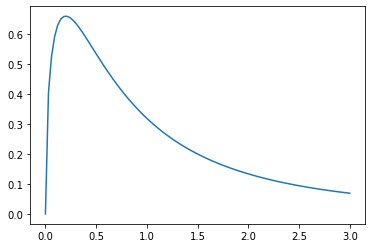

In [194]:
# 自由度（3,3）のF分布
plt.plot(x, y)

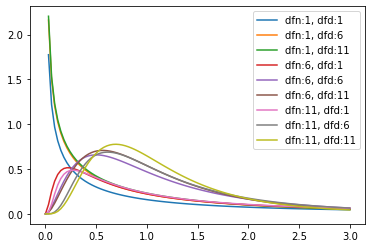

In [195]:
x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f.pdf(x, dfn=dfn, dfd=dfd)
        plt.plot(x, y , label=f'dfn:{dfn}, dfd:{dfd}')
plt.legend()

## F検定

Challenge

データセットを標本と見立てて、男女のチップ率の分散に差があるかF分布を使って考えよう

In [196]:
np.var(male_tipr)

0.004169445577529407

In [197]:
np.var(female_tipr)

0.0028433004255488206

In [198]:
# 標本の不偏分散を確認する：
n1 = len(male_tipr)
n2 = len(female_tipr)
dfn = n1 - 1
dfd = n2 - 2
var1 = stats.tvar(male_tipr)
var2 = stats.tvar(female_tipr)
f = var1/var2
print(f)

1.4588472200534603


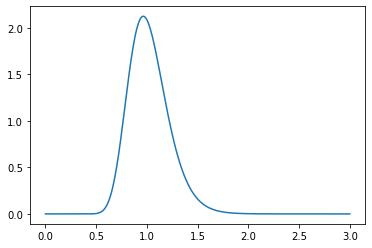

In [199]:
# (ｄｆn,　dfd)のF分布で、F値=1.4588472200534603の右側の面積S(ｐ値)を計算すれば良い
x = np.linspace(0, 3, 300)
y = stats.f(dfn=dfn, dfd=dfd).pdf(x)
plt.plot(x, y)

In [200]:
# ｐ値の算出：面積Sはsf()で算出することが可能
# ｐ値が5%より小さい：棄却域に存在し帰無仮説：「2群の分散は等しい」を棄却する。よって、分散は等しくない。
stats.f(dfn=dfn, dfd=dfd).sf(f)

0.02762905634575641

# セクション14 対応ありの平均値差の検定

対応ありの平均値差の検定
- stats.ttest_rel(a, b)
    - a,bはデータのarray
    - 第1戻り値は検定統計量t
    - 第2戻り値はｐ値

In [201]:
# 実際の血圧データを使ってやってみよう
bp_df = pd.read_csv('blood_pressure.csv')

In [202]:
bp_df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [203]:
# alternativeで両側検定、片側検定を決めれる。デフォルトは両側検定
stats.ttest_rel(bp_df['bp_before'], bp_df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

In [204]:
# 片側検定：ｐ値5%未満で棄却域に存在　->　帰無仮説「投薬前後の効果がない」を棄却する。結論：投薬により効果はあると判断。
stats.ttest_rel(bp_df['bp_before'], bp_df['bp_after'], alternative='greater')

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0005648957322420411)

In [205]:
bp_df['bp_before'].mean()

156.45

In [206]:
bp_df['bp_after'].mean()

151.35833333333332

In [207]:
bp_df['delta'] = bp_df['bp_before'] - bp_df['bp_after']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delta'>

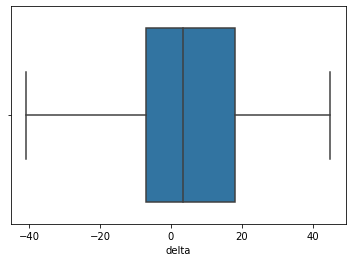

In [208]:
sns.boxplot(bp_df['delta'])

# セクション16 検定力分析

## Cohen's d


Challenge

Cohen's dを返す関数を作ってみよう
2つの引数（各標本のデータ）をとってCohen's dを返す関数を作ってみよう

In [222]:
def cohen_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    dof = n1 + n2 - 2
    std = np.sqrt(((n1-1)*stats.tvar(x1) + (n2-1)*stats.tvar(x2))/dof)
    return np.abs(np.mean(x1) - np.mean(x2))/std

In [223]:
# Cohen's dを求めてみよう
# tipデータを標本として、男女のチップ率の効果量（Cohen's d）を求めてみよう

In [224]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [225]:
male_tip_rate = df[df['sex'] == 'Male']['tip_rate']
female_tip_rate = df[df['sex'] == 'Female']['tip_rate']

In [226]:
# Cohen's dの効果量
cohen_d(male_tip_rate, female_tip_rate)

0.14480153987269248

## 検定力分析

有意水準、効果量、検定力、サンプルサイズを残りの値から算出する
- statsmodels.stats.power.TTestPolwerクラス
    - power = TTestIndPower()でインスタンス化
- .solve_power(effetct_size, nobs1, alpha, power, ratio, alternative)
    - effect_size: 効果量（Cohens d）
    - nobs1: 標本1のサイズ
    - alpha: 有意水準
    - power: 検定力
    _ ratio: 標本1に対する標本2の大きさ（n2/n1）
    - alternative: 両側検定、片側検定（'two-sided', 'smaller', 'larger'）
    - 算出したいパラメータをNoneにする

Challenge

検定力を求めてみよう<br>
tipデータを標本として男女のチップ率の平均値差の検定を行った場合の検定力を求めてみよう<br>
(両側検定で有意水準5%とする)

In [230]:
power = TTestIndPower()

In [235]:
# チップ率のｔ検定の結果　-> ｐ値25%で優位差なし
# equal_var = False でウェルチのｔ検定
# このt検定の検定力はどれぐらいなのか？
stats.ttest_ind(male_tip_rate, female_tip_rate, equal_var=False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

In [239]:
# 上記のｔ検定の検定力（power）を求める
# 検定力は正しく帰無仮説を棄却できる確率
# 検定力：　0.19で、検定力は０.8を目指すのが一般的なので、このｔ検定は検定力が低いということになる
# 今回は効果量が低いので、検定力も低くなる。そのため、サンプルサイズも増やす必要がある。
#　どれぐらい増やせば良いのか？
effect_size = cohen_d(male_tip_rate, female_tip_rate)
n1 = len(male_tip_rate)
n2 = len(female_tip_rate)
power.solve_power(effect_size=effect_size, nobs1=n1, alpha=0.05, ratio=n2/n1, power=None)

0.19038260700802212

必要な標本の大きさを求めてみよう<br>
tipデータセットを標本として男女のチップ率の平均値差の検定を行う場合、検定力を０.8にするために必要なサンプルサイズを求めてみよう<br>
(両側検定で有意水準5%とし、効果量は手元にある標本から仮定する)

In [240]:
# 必要なサンプルサイズを知るために、nobs1の部分をNoneにする
effect_size = cohen_d(male_tip_rate, female_tip_rate)
n1 = len(male_tip_rate)
n2 = len(female_tip_rate)
power.solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, ratio=n2/n1, power=0.8)

1051.0959553846506

In [241]:
n2/n1 * 1051

582.4012738853503

## 検定力の推移

検定力の推移を描画する
- statsmodels.stats.power.TTestIndPowerクラス
    - power = TTestIndPower()でインスタンス化
- .plot_power(dep_var, nobs, effect_size, alpha)
    - dep_var: ｘ軸の変数（ex. 'nobs'）
    - nobs: 標本のサイズ（x軸に指定した場合、ｘ軸のarray）
    - effect_size: 効果量のリスト
    - alpha: 有意水準

In [ ]:
# 例：　効果量が　0.2, 0.5, 0.8のケースのサンプルサイズによる検定力の推移を描画する

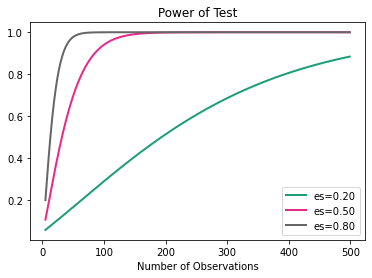

In [248]:
fig = power.plot_power(dep_var='nobs', nobs=np.array(range(5, 500)), effect_size=[0.2, 0.5, 0.8], alpha=0.05)